##Job Market Analysis Solution 

**Steps to be performed**
        1) Connect to Job Posting WebSite 
                a) Either through Web Scraping 
                b) Through it's Public Api Provided By it 
        2)  Titles of positions available
            Locations where the roles are offered (including remote)
            Type of positions (Full-time or Part-time)
            Key skills required for these positions (use appropriate visualization techniques to present
            your findings)
        3) Data Visulalation 
             a) Location vs No of Job's Available 
             b) Most common Key Skills required 
         
                 

                


In [222]:
import requests
import random
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from pprint import pprint
import re
import matplotlib.pyplot as plt

In [145]:

from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

chrome_options = Options()
chrome_options.add_argument("chromedriver.exe")

driver = webdriver.Chrome(options=chrome_options)

driver.get("https://linkedin.com/uas/login")

WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.ID, "username")))

username = driver.find_element(By.ID, "username")
username.send_keys("Enter Email address")

WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.ID, "password")))

pword = driver.find_element(By.ID, "password")
pword.send_keys(input("Enter Password "))

D
WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, "//button[@type='submit']")))

driver.find_element(By.XPATH, "//button[@type='submit']").click()

In [42]:
job_postings=[]

**Now we need to get Get all the required info of Job Post by page by page**

In [54]:
from time import sleep

for pageNo in range(10):
    query = 'Data Scientist'
    location = 'United States'
    url = f'https://www.linkedin.com/jobs/search/?keywords={query}&location={location}&start={25 * (pageNo)}'
    driver.get(url)
    sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    job_postings.append(soup.find('ul', {'class': 'scaffold-layout__list-container'}))


In [301]:
#print(job_postings)

In [303]:
#pprint(job_postings[0][0])

In [304]:
job_title = job_postings[9][6].find('a', class_='job-card-list__title').get_text().strip()
print((job_title))

Entry/Junior Level Data Scientist/Python Programmer


**Now we will Loop through all 10 Pages and Fetceh all Relevent Data**

In [96]:
data = []
for i in range(10):
    for j in range(7):
        try:
            job_title = job_postings[i][j].find('a', class_='job-card-list__title').get_text().strip()
        except AttributeError:
            job_title = None
        try:
            company_name_span= job_postings[i][j].find('span')
            span_tag = job_postings[i][j].find('span', class_='job-card-container__primary-description')
            company_name = span_tag.get_text(strip=True)
        except AttributeError:
            job_title = None
        try:
            location = job_postings[i][j].find('li', class_='job-card-container__metadata-item').get_text().strip()
        except AttributeError:
            location = None
        try:
            jobPostRedirectUrltag=job_postings[i][j].find('a', class_='disabled ember-view job-card-container__link job-card-list__title')
            jobPostRedirectUrl="https://www.linkedin.com/"+jobPostRedirectUrltag.get('href')
        except AttributeError:
            location = None

        data.append({
            'Job Title': job_title,
            'Company Name': company_name,
            'Location': location,
            'jobPostRedirectUrl':jobPostRedirectUrl,
            'skills List':[]
        })

**We need to get specific job post redirect Url**

In [305]:
#print(data)

In [0]:
df = pd.DataFrame(data)

In [146]:

csv_file = 'JobSearchResult.csv'

df.to_csv(csv_file,index=False)

In [100]:
df

,Job Title,Company Name,Location,jobPostRedirectUrl,skills List
0,Sustainability Data Scientist,Tricon Energy,"Houston, TX (Hybrid)",https://www.linkedin.com//jobs/view/3760414018...,[]
1,Data Scientist,HCLTech,United States (Remote),https://www.linkedin.com//jobs/view/3775635396...,[]
2,Data Scientist (L5) - Member Product,Netflix,United States (Remote),https://www.linkedin.com//jobs/view/3774920311...,[]
3,"Business Data Scientist, Early Career (2024)",Figma,"San Francisco, CA (Hybrid)",https://www.linkedin.com//jobs/view/3762683180...,[]
4,Data Scientist,ascena,United States (Remote),https://www.linkedin.com//jobs/view/3675232968...,[]
...,...,...,...,...,...
65,Data Scientist,"Client Resources, Inc.",United States (Remote),https://www.linkedin.com//jobs/view/3762670467...,[]
66,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Houston, TX (On-site)",https://www.linkedin.com//jobs/view/3767591593...,[]
67,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Sandy Springs, GA",https://www.linkedin.com//jobs/view/3767593372...,[]
68,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Fresno, CA",https://www.linkedin.com//jobs/view/3767598059...,[]


**After Getting Job Post Redirect url**

    --> Go to Job Posting Url and Get the All Skills 

In [0]:
jobPosturl = df['jobPostRedirectUrl'][0]
driver.get(jobPosturl)
wait = WebDriverWait(driver, 20)
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID,'how-you-match-card-container')))

soupJob = BeautifulSoup(driver.page_source, 'html.parser')
with open('output.html', 'w', encoding='utf-8') as file:
    file.write(soupJob.prettify())

In [0]:
skillsDivtag = soupJob.find('div', class_='job-details-how-you-match-card__container mb4 artdeco-card')
print(skillsDivtag.find('button').get('id'))

In [0]:
wait = WebDriverWait(driver, 20)
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID,'how-you-match-card-container')))
soupJob = BeautifulSoup(driver.page_source, 'html.parser')
skillsDivtag = soupJob.find('div', class_='job-details-how-you-match-card__container mb4 artdeco-card')
skillsDivtag.find('button').get('id')

In [0]:
button = driver.find_element(By.ID, skillsDivtag.find('button').get('id'))
button.click()
soup = BeautifulSoup(driver.page_source, 'html.parser')
Skills = soup.find_all('ul', {'class': 'job-details-skill-match-status-list'})
print(Skills)

In [173]:


print(Skills[0].getText().replace("\n",",").replace(" ","").replace("Add",'').replace(",,",","))

print(re.sub(',+', ',', Skills[0].getText().replace("\n",",").replace(" ","").replace("Add",'')))

,,,,,DataScience,,,,,,,Python(ProgrammingLanguage),,,,,,,AnalyticalSkills,,,,,,,,,,,DataModeling,,,,,,,,,,,MicrosoftAzure,,,,,,,,,,,ProblemSolving,,,,,,,,,,,ProjectManagement,,,,,,,,,,,ResearchSkills,,,,,,,,,,,SharePoint,,,,,,,,,,,SustainabilityData,,,,,,,
,DataScience,Python(ProgrammingLanguage),AnalyticalSkills,DataModeling,MicrosoftAzure,ProblemSolving,ProjectManagement,ResearchSkills,SharePoint,SustainabilityData,


In [0]:
Skills_list = Skills[0].getText().replace("\n",",").replace(" ","").replace("Add","").replace(",,","").split(",")

In [167]:
print(Skills_list)

['DataScience', 'Python(ProgrammingLanguage)', 'AnalyticalSkillsDataModelingMicrosoftAzureProblemSolvingProjectManagementResearchSkillsSharePointSustainabilityData', '']


In [ ]:

print(Skills[0].getText().replace("\n","").replace(" ","").replace("Add",","))
Skills_list = Skills[0].getText().replace("\n","").replace(" ","").replace("Add",",").split(',')

In [175]:
df

,Job Title,Company Name,Location,jobPostRedirectUrl,skills List
0,Sustainability Data Scientist,Tricon Energy,"Houston, TX (Hybrid)",https://www.linkedin.com//jobs/view/3760414018...,[]
1,Data Scientist,HCLTech,United States (Remote),https://www.linkedin.com//jobs/view/3775635396...,[]
2,Data Scientist (L5) - Member Product,Netflix,United States (Remote),https://www.linkedin.com//jobs/view/3774920311...,[]
3,"Business Data Scientist, Early Career (2024)",Figma,"San Francisco, CA (Hybrid)",https://www.linkedin.com//jobs/view/3762683180...,[]
4,Data Scientist,ascena,United States (Remote),https://www.linkedin.com//jobs/view/3675232968...,[]
...,...,...,...,...,...
65,Data Scientist,"Client Resources, Inc.",United States (Remote),https://www.linkedin.com//jobs/view/3762670467...,[]
66,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Houston, TX (On-site)",https://www.linkedin.com//jobs/view/3767591593...,[]
67,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Sandy Springs, GA",https://www.linkedin.com//jobs/view/3767593372...,[]
68,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Fresno, CA",https://www.linkedin.com//jobs/view/3767598059...,[]


**Now we will fetch required Skill Set Generated by Linkedin based on the job description and insert that list in the datad frame**
![Skills Step 1](skillsButton.png)
![Skills step2](skills2.png)

In [187]:
count=0
for url in df['jobPostRedirectUrl']:
    driver.get(url)
    wait = WebDriverWait(driver, 20)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID,'how-you-match-card-container')))
    soupJob = BeautifulSoup(driver.page_source, 'html.parser')
    skillsDivtag = soupJob.find('div', class_='job-details-how-you-match-card__container mb4 artdeco-card')
    skillsDivtag.find('button').get('id')
    button = driver.find_element(By.ID, skillsDivtag.find('button').get('id'))
    button.click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,'job-details-skill-match-status-list')))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    Skills = soup.find('ul', {'class': 'job-details-skill-match-status-list'})
    result=re.sub(',+', ',', Skills.getText().replace("\n",",").replace(" ","").replace("Add",''))
    Skills_list = result.split(",")
    df['skills List'][count]=Skills_list
    count=count+1
    sleep(5)

In [188]:
print(Skills_list)

['', 'ComputerScience', 'CoreJava', 'DataAnalytics', 'DataScience', 'DataVisualization', 'Java', 'PatternRecognition', 'Programming', 'ProgrammingLanguages', 'SoftwareDevelopmentLifeCycle(SDLC)', '']


In [189]:
df

,Job Title,Company Name,Location,jobPostRedirectUrl,skills List
0,Sustainability Data Scientist,Tricon Energy,"Houston, TX (Hybrid)",https://www.linkedin.com//jobs/view/3760414018...,"[, DataScience, Python(ProgrammingLanguage), A..."
1,Data Scientist,HCLTech,United States (Remote),https://www.linkedin.com//jobs/view/3775635396...,"[, ComputerEngineering, ComputerScience, DataS..."
2,Data Scientist (L5) - Member Product,Netflix,United States (Remote),https://www.linkedin.com//jobs/view/3774920311...,"[, DataScience, DataVisualization, SQL, Commun..."
3,"Business Data Scientist, Early Career (2024)",Figma,"San Francisco, CA (Hybrid)",https://www.linkedin.com//jobs/view/3762683180...,"[, ComputerScience, DataScience, Python(Progra..."
4,Data Scientist,ascena,United States (Remote),https://www.linkedin.com//jobs/view/3675232968...,"[, ComputerScience, DataAnalytics, DataScience..."
...,...,...,...,...,...
65,Data Scientist,"Client Resources, Inc.",United States (Remote),https://www.linkedin.com//jobs/view/3762670467...,"[, C++, ComputerScience, DataScience, Java, Py..."
66,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Houston, TX (On-site)",https://www.linkedin.com//jobs/view/3767591593...,"[, CoreJava, DataAnalytics, DataMining, DataSc..."
67,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Sandy Springs, GA",https://www.linkedin.com//jobs/view/3767593372...,"[, ComputerScience, CoreJava, DataAnalytics, D..."
68,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Fresno, CA",https://www.linkedin.com//jobs/view/3767598059...,"[, ComputerScience, CoreJava, DataAnalytics, D..."


In [190]:
csv_file = 'JobSearchResult.csv'

df.to_csv(csv_file,index=False)

,Job Title,Company Name,Location,jobPostRedirectUrl,skills List
0,Sustainability Data Scientist,Tricon Energy,"Houston, TX (Hybrid)",https://www.linkedin.com//jobs/view/3760414018...,"[, DataScience, Python(ProgrammingLanguage), A..."
1,Data Scientist,HCLTech,United States (Remote),https://www.linkedin.com//jobs/view/3775635396...,"[, ComputerEngineering, ComputerScience, DataS..."
2,Data Scientist (L5) - Member Product,Netflix,United States (Remote),https://www.linkedin.com//jobs/view/3774920311...,"[, DataScience, DataVisualization, SQL, Commun..."
3,"Business Data Scientist, Early Career (2024)",Figma,"San Francisco, CA (Hybrid)",https://www.linkedin.com//jobs/view/3762683180...,"[, ComputerScience, DataScience, Python(Progra..."
4,Data Scientist,ascena,United States (Remote),https://www.linkedin.com//jobs/view/3675232968...,"[, ComputerScience, DataAnalytics, DataScience..."
...,...,...,...,...,...
65,Data Scientist,"Client Resources, Inc.",United States (Remote),https://www.linkedin.com//jobs/view/3762670467...,"[, C++, ComputerScience, DataScience, Java, Py..."
66,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Houston, TX (On-site)",https://www.linkedin.com//jobs/view/3767591593...,"[, CoreJava, DataAnalytics, DataMining, DataSc..."
67,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Sandy Springs, GA",https://www.linkedin.com//jobs/view/3767593372...,"[, ComputerScience, CoreJava, DataAnalytics, D..."
68,Entry/Junior Level Data Scientist/Python Progr...,SynergisticIT,"Fresno, CA",https://www.linkedin.com//jobs/view/3767598059...,"[, ComputerScience, CoreJava, DataAnalytics, D..."


**Now we can Combine all Skill Set Required Fields and Find the Most Required Skills**

In [192]:
MostRequiredSkills={}

In [194]:
for skills in df['skills List']:
    for entry in skills:
        if entry in MostRequiredSkills:
            MostRequiredSkills[entry]=MostRequiredSkills[entry]+1
        else:
            MostRequiredSkills[entry]=1

In [197]:
MostRequiredSkills.pop('')

141

In [0]:
MostRequiredSkills['MachineLearning']=MostRequiredSkills['MachineLearning']+MostRequiredSkills['MachineLearningAlgorithms']

In [236]:
MostRequiredSkills['DataAnalysis']=MostRequiredSkills['Analytics']+MostRequiredSkills['AnalyticalSolutions']+MostRequiredSkills['DataAnalysis']+MostRequiredSkills['DataAnalytics']


In [237]:
MostRequiredSkillsDf={
    'Skill':MostRequiredSkills.keys(),
        'Count':MostRequiredSkills.values()
}

In [238]:
MostRequiredSkillsDf

{'Skill': dict_keys(['DataScience', 'Python(ProgrammingLanguage)', 'AnalyticalSkills', 'DataModeling', 'MicrosoftAzure', 'ProblemSolving', 'ProjectManagement', 'ResearchSkills', 'SharePoint', 'SustainabilityData', 'ComputerEngineering', 'ComputerScience', 'Troubleshooting', 'CollaborationTools', 'Communication', 'Extract', 'Transform', 'Load(ETL)', 'OralCommunication', 'DataVisualization', 'SQL', 'Mathematics', 'PredictiveAnalytics', 'R(ProgrammingLanguage)', 'StatisticalDataAnalysis', 'StatisticalProgramming', 'Compensation', 'Economics', 'EmployeeBenefits', 'KnowledgeAcquisition', 'Teamwork', 'DataAnalytics', 'NaturalLanguageProcessing(NLP)', 'AnalyticProblemSolving', 'AnalyticalSolutions', 'Analytics', 'DataAnalysis', 'ApacheSpark', 'BusinessUnderstanding', 'Datasets', 'OnlineDating', 'Scripting', 'DataEngineering', 'DeepLearning', 'ClusterAnalysis', 'GoogleCloudPlatform(GCP)', 'MLOps', 'CausalInference', 'CreativeProblemSolving', 'ExperimentalDesign', 'StatisticalModeling', 'CoreJa

In [239]:
MostRequiredSkillsDf=pd.DataFrame(MostRequiredSkillsDf)

In [240]:
MostRequiredSkillsDf

,Skill,Count
0,DataScience,65
1,Python(ProgrammingLanguage),19
2,AnalyticalSkills,14
3,DataModeling,8
4,MicrosoftAzure,2
...,...,...
138,TechnicalRequirements,1
139,DownstreamProcessing,1
140,Prototyping,1
141,FrameworkDesign,1


**Let's Group the Skills In to 3 Sets Based on the Count**
            Group A  > 20 
            Group B  > 10 && <20
            Group C  < 10

In [251]:

MostRequiredSkillsDfgroup_A = MostRequiredSkillsDf[MostRequiredSkillsDf['Count'] > 20]
MostRequiredSkillsDfgroup_B = MostRequiredSkillsDf[(MostRequiredSkillsDf['Count'] > 10 ) & (MostRequiredSkillsDf['Count'] <20)]
MostRequiredSkillsDfgroup_C = MostRequiredSkillsDf[(MostRequiredSkillsDf['Count'] < 10) & (MostRequiredSkillsDf['Count'] > 5) ]

In [252]:
MostRequiredSkillsDfgroup_B

,Skill,Count
1,Python(ProgrammingLanguage),19
2,AnalyticalSkills,14
14,Communication,13
20,SQL,16
35,Analytics,15
55,SoftwareDevelopment,16
64,Cracking,19
65,Shortlisting,17
81,PatternRecognition,13


**The Most Generic Skills Required For Most Job are Represented in Below Graph**

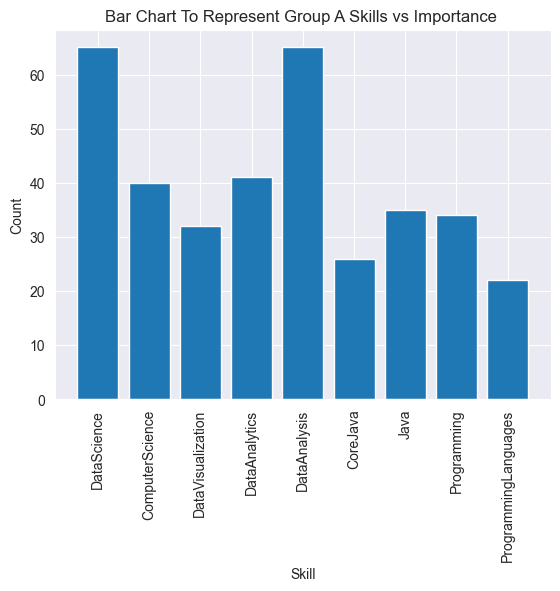

In [253]:
plt.bar(MostRequiredSkillsDfgroup_A['Skill'], MostRequiredSkillsDfgroup_A['Count'])
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Bar Chart To Represent Group A Skills vs Importance ')
plt.xticks(rotation='vertical')
plt.show()

**The Most Common Skills Required For Most Job are Represented in Below Graph**


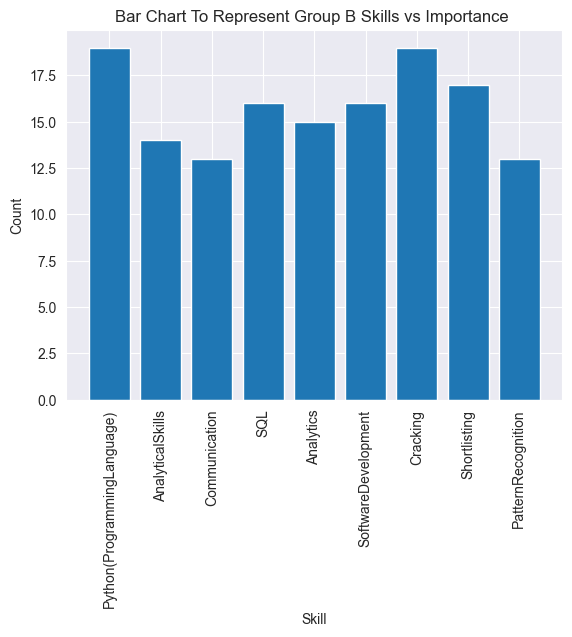

In [254]:
plt.bar(MostRequiredSkillsDfgroup_B['Skill'], MostRequiredSkillsDfgroup_B['Count'])
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Bar Chart To Represent Group B Skills vs Importance ')
plt.xticks(rotation='vertical')
plt.show()

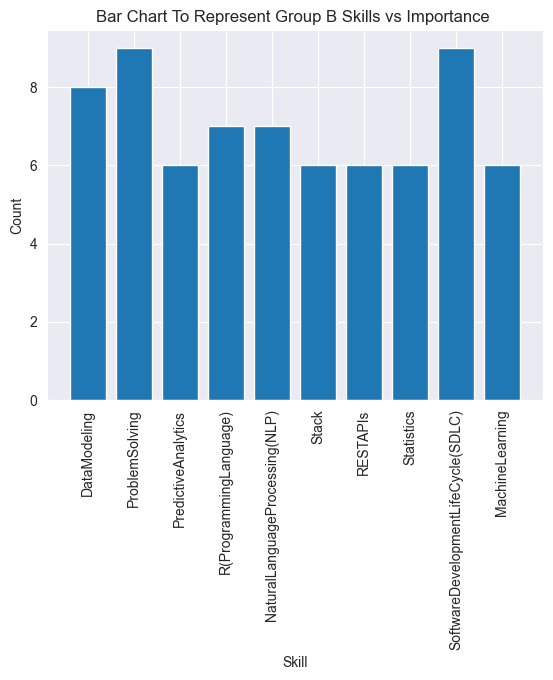

In [255]:
plt.bar(MostRequiredSkillsDfgroup_C['Skill'], MostRequiredSkillsDfgroup_C['Count'])
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Bar Chart To Represent Group B Skills vs Importance ')
plt.xticks(rotation='vertical')
plt.show()

In [284]:
JobVsLocation={}

In [285]:
((df['Location'][0].split(','))[1].split('('))[0].strip()

'TX'

In [286]:
for entry in df['Location']:
    if ',' in entry:
        location=((entry.split(','))[1].split('('))[0].strip()
        if location in JobVsLocation:
            JobVsLocation[location]=JobVsLocation[location]+1
        else:
            JobVsLocation[location]=1

In [294]:
JobVsLocation.pop("United States")
JobVsLocationDf={
    'Location':JobVsLocation.keys(),
    'Count':JobVsLocation.values()
}

In [295]:
JobVsLocationDf=pd.DataFrame(JobVsLocationDf)

In [297]:
JobVsLocationDf

,Location,Count
0,TX,8
1,CA,18
2,IL,5
3,NY,3
4,MA,2
5,OR,1
6,AZ,1
7,GA,2
8,KY,1
9,FL,4


**Percentage Distribution of Jobs in United States**

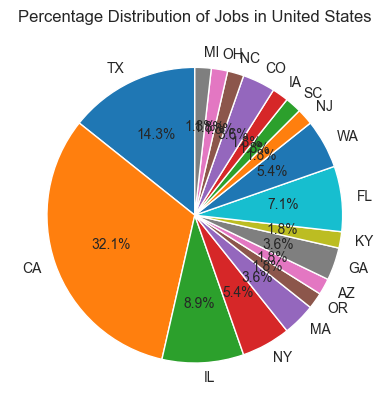

In [306]:
plt.pie(JobVsLocationDf['Count'], labels=JobVsLocationDf['Location'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Jobs in United States')
plt.show()